In [382]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np

In [81]:
import locale
locale.setlocale(locale.LC_TIME, 'Spanish_Spain.1252') 

'Spanish_Spain.1252'

# ETL - EDA

In [38]:
df_hechos = pd.read_excel('homicidios.xlsx', sheet_name='HECHOS')
df_hechos

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,2021-0093,1,2021-12-13,2021,12,13,17:10:00,17,AV. RIESTRA Y MOM,AVENIDA,...,NaN,MOM,RIESTRA AV. y MOM,7,Point (102728.60090138 98186.24929177),-58.43353773,-34.64561636,MOTO-AUTO,MOTO,AUTO
692,2021-0094,1,2021-12-20,2021,12,20,01:10:00,1,AU DELLEPIANE Y LACARRA,AUTOPISTA,...,NaN,LACARRA AV.,"DELLEPIANE, LUIS, TTE. GRAL. y LACARRA AV.",9,Point (99624.29795829 97569.69801131),-58.46739825,-34.65117757,MOTO-AUTO,MOTO,AUTO
693,2021-0095,1,2021-12-30,2021,12,30,00:43:00,0,AV. GAONA Y TERRADA,AVENIDA,...,NaN,TERRADA,GAONA AV. y TERRADA,11,Point (99116.45492358 101045.23284826),-58.47293407,-34.61984745,MOTO-CARGAS,MOTO,CARGAS
694,2021-0096,1,2021-12-15,2021,12,15,10:30:00,10,AV. EVA PERON 4071,AVENIDA,...,4071.0,NaN,"PERON, EVA AV. 4071",9,Point (99324.54463985 97676.26932409),-58.47066794,-34.65021673,AUTO-CARGAS,AUTO,CARGAS


In [12]:
df_hechos.columns

Index(['ID', 'N_VICTIMAS', 'FECHA', 'AAAA', 'MM', 'DD', 'HORA', 'HH',
       'LUGAR_DEL_HECHO', 'TIPO_DE_CALLE', 'Calle', 'Altura', 'Cruce',
       'Dirección Normalizada', 'COMUNA', 'XY (CABA)', 'pos x', 'pos y',
       'PARTICIPANTES', 'VICTIMA', 'ACUSADO'],
      dtype='object')

## Hechos Analisis

In [254]:
hechos_an = df_hechos.copy()

In [221]:
hechos_an.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     696 non-null    object        
 1   N_VICTIMAS             696 non-null    int64         
 2   FECHA                  696 non-null    datetime64[ns]
 3   AAAA                   696 non-null    int64         
 4   MM                     696 non-null    int64         
 5   DD                     696 non-null    int64         
 6   HORA                   696 non-null    object        
 7   HH                     696 non-null    object        
 8   LUGAR_DEL_HECHO        696 non-null    object        
 9   TIPO_DE_CALLE          696 non-null    object        
 10  Calle                  695 non-null    object        
 11  Altura                 129 non-null    float64       
 12  Cruce                  525 non-null    object        
 13  Direc

In [114]:
hechos_an.isnull().sum()

ID                 0
N_VICTIMAS         0
FECHA              0
AAAA               0
MM                 0
HORA               0
HH                 0
TIPO_DE_CALLE      0
Calle              1
Altura           567
Cruce            171
COMUNA             0
PARTICIPANTES      0
VICTIMA            0
ACUSADO            0
DIA_SEMANA         0
VIAS_INVOL         0
dtype: int64

In [70]:
hechos_an

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,2021-0093,1,2021-12-13,2021,12,13,17:10:00,17,AV. RIESTRA Y MOM,AVENIDA,...,NaN,MOM,RIESTRA AV. y MOM,7,Point (102728.60090138 98186.24929177),-58.43353773,-34.64561636,MOTO-AUTO,MOTO,AUTO
692,2021-0094,1,2021-12-20,2021,12,20,01:10:00,1,AU DELLEPIANE Y LACARRA,AUTOPISTA,...,NaN,LACARRA AV.,"DELLEPIANE, LUIS, TTE. GRAL. y LACARRA AV.",9,Point (99624.29795829 97569.69801131),-58.46739825,-34.65117757,MOTO-AUTO,MOTO,AUTO
693,2021-0095,1,2021-12-30,2021,12,30,00:43:00,0,AV. GAONA Y TERRADA,AVENIDA,...,NaN,TERRADA,GAONA AV. y TERRADA,11,Point (99116.45492358 101045.23284826),-58.47293407,-34.61984745,MOTO-CARGAS,MOTO,CARGAS
694,2021-0096,1,2021-12-15,2021,12,15,10:30:00,10,AV. EVA PERON 4071,AVENIDA,...,4071.0,NaN,"PERON, EVA AV. 4071",9,Point (99324.54463985 97676.26932409),-58.47066794,-34.65021673,AUTO-CARGAS,AUTO,CARGAS


In [255]:
hechos_an.drop(columns=['LUGAR_DEL_HECHO','Dirección Normalizada','XY (CABA)', 'pos x', 'pos y','PARTICIPANTES'],inplace=True)

### Dia de la semana

- 0 = Lunes
- 1 = Martes
- 2 = Miercoles

In [256]:
#hechos_an['DIA_SEMANA_NOM'] = hechos_an['FECHA'].dt.strftime('%A').str.upper()
hechos_an['DIA_SEMANA'] = hechos_an['FECHA'].dt.weekday

In [257]:
hechos_an.drop(columns=['DD','FECHA'],inplace=True)

In [258]:
hechos_an

,ID,N_VICTIMAS,AAAA,MM,HORA,HH,TIPO_DE_CALLE,Calle,Altura,Cruce,COMUNA,VICTIMA,ACUSADO,DIA_SEMANA
0,2016-0001,1,2016,1,04:00:00,4,AVENIDA,PIEDRA BUENA AV.,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.",8,MOTO,AUTO,4
1,2016-0002,1,2016,1,01:15:00,1,GRAL PAZ,"PAZ, GRAL. AV.",NaN,DE LOS CORRALES AV.,9,AUTO,PASAJEROS,5
2,2016-0003,1,2016,1,07:00:00,7,AVENIDA,ENTRE RIOS AV.,2034.0,NaN,1,MOTO,AUTO,6
3,2016-0004,1,2016,1,00:00:00,0,AVENIDA,LARRAZABAL AV.,NaN,"VILLEGAS, CONRADO, GRAL.",8,MOTO,SD,6
4,2016-0005,1,2016,1,05:20:00,5,AVENIDA,SAN JUAN AV.,NaN,"SAENZ PE?A, LUIS, PRES.",1,MOTO,PASAJEROS,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,2021-0093,1,2021,12,17:10:00,17,AVENIDA,RIESTRA AV.,NaN,MOM,7,MOTO,AUTO,0
692,2021-0094,1,2021,12,01:10:00,1,AUTOPISTA,"DELLEPIANE, LUIS, TTE. GRAL.",NaN,LACARRA AV.,9,MOTO,AUTO,0
693,2021-0095,1,2021,12,00:43:00,0,AVENIDA,GAONA AV.,NaN,TERRADA,11,MOTO,CARGAS,3
694,2021-0096,1,2021,12,10:30:00,10,AVENIDA,"PERON, EVA AV.",4071.0,NaN,9,AUTO,CARGAS,2


### Vias involucradas

In [225]:
hechos_an['Calle'].unique().size

280

In [226]:
hechos_an['Cruce'].unique().size

318

In [259]:
hechos_an['VIAS_INVOL']=hechos_an.apply(lambda row: [row['Calle'], row['Cruce']] if pd.notnull(row['Cruce']) else [row['Calle']], axis=1)

In [260]:
hechos_an[['Calle','Cruce','VIAS_INVOL']]

,Calle,Cruce,VIAS_INVOL
0,PIEDRA BUENA AV.,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","[PIEDRA BUENA AV., FERNANDEZ DE LA CRUZ, F., G..."
1,"PAZ, GRAL. AV.",DE LOS CORRALES AV.,"[PAZ, GRAL. AV., DE LOS CORRALES AV.]"
2,ENTRE RIOS AV.,NaN,[ENTRE RIOS AV.]
3,LARRAZABAL AV.,"VILLEGAS, CONRADO, GRAL.","[LARRAZABAL AV., VILLEGAS, CONRADO, GRAL.]"
4,SAN JUAN AV.,"SAENZ PE?A, LUIS, PRES.","[SAN JUAN AV., SAENZ PE?A, LUIS, PRES.]"
...,...,...,...
691,RIESTRA AV.,MOM,"[RIESTRA AV., MOM]"
692,"DELLEPIANE, LUIS, TTE. GRAL.",LACARRA AV.,"[DELLEPIANE, LUIS, TTE. GRAL., LACARRA AV.]"
693,GAONA AV.,TERRADA,"[GAONA AV., TERRADA]"
694,"PERON, EVA AV.",NaN,"[PERON, EVA AV.]"


### Intersecciones

Se decidio declarar una variable que indicara si el siniestro se produjo en una interseccion. Para esto se observo que los hechos ocurridos en intersecciones contenian el nombre de la segunda via en la columna *Cruce* y los que ocurrian a mitad de cuadra tenian la especificacion en la columna *Altura*. Sin embargo, se encontro que existian hechos que no tenian valores en ninguna de las dos columnas antes mencionadas. Se analizo detenidamente la columna *LUGAR_DEL_HECHO* y se identifico que estos tenian una especificacion equivalente a la altura en su despripcion (en su mayoria en KM). De acuerdo con esto, se tomo que los valores en nulo de la columna *Cruce* tuvieran o no valor de *Altura* eran siniestros que no ocurrieron en una interseccion. De esta manera, se declaró la columna __*INTERSECCION*__ como 1 para hechos en interseccion y 0 para los que no.

In [162]:
pd.set_option('display.max_colwidth', None)
print(df_hechos[(df_hechos['Altura'].isnull())&(df_hechos['Cruce'].isnull())]['LUGAR_DEL_HECHO'])
pd.reset_option('display.max_colwidth')

35                                   AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI KM. 0,700
38                                                             AUTOPISTA LUGONES PK 10000
64                                       AUTOPISTA 1 SUR PTE ARTURO FRONDIZI Y AV CASEROS
71                                           AUTOPISTA DELLEPIANE LUIS TTE. GRAL. KM. 2,3
81                                                AUTOPISTA 9 DE JULIO SUR ALT AV MENDOZA
91                                             AUTOPISTA 1 SUR PTE ARTURO FRONDIZI KM 2.9
100                                                  AUTOPISTA 9 DE JULIO SUR Y AV BRASIL
106                                                      AU BUENOS AIRES - LA PLATA KM. 4
119                                                                                    SD
127                                                   AUTOPISTA PERITO MORENO ALTURA VELZ
139                                                                  AUTOPISTA 25 DE MAYO
148       

In [261]:
hechos_an['INTERSECCION'] = hechos_an['Cruce'].notnull().astype(int)

In [262]:
hechos_an['INTERSECCION'].value_counts()

INTERSECCION
1    525
0    171
Name: count, dtype: int64

In [263]:
hechos_an.drop(columns=['Calle','Cruce','Altura'],inplace=True)

In [264]:
hechos_an

,ID,N_VICTIMAS,AAAA,MM,HORA,HH,TIPO_DE_CALLE,COMUNA,VICTIMA,ACUSADO,DIA_SEMANA,VIAS_INVOL,INTERSECCION
0,2016-0001,1,2016,1,04:00:00,4,AVENIDA,8,MOTO,AUTO,4,"[PIEDRA BUENA AV., FERNANDEZ DE LA CRUZ, F., G...",1
1,2016-0002,1,2016,1,01:15:00,1,GRAL PAZ,9,AUTO,PASAJEROS,5,"[PAZ, GRAL. AV., DE LOS CORRALES AV.]",1
2,2016-0003,1,2016,1,07:00:00,7,AVENIDA,1,MOTO,AUTO,6,[ENTRE RIOS AV.],0
3,2016-0004,1,2016,1,00:00:00,0,AVENIDA,8,MOTO,SD,6,"[LARRAZABAL AV., VILLEGAS, CONRADO, GRAL.]",1
4,2016-0005,1,2016,1,05:20:00,5,AVENIDA,1,MOTO,PASAJEROS,3,"[SAN JUAN AV., SAENZ PE?A, LUIS, PRES.]",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,2021-0093,1,2021,12,17:10:00,17,AVENIDA,7,MOTO,AUTO,0,"[RIESTRA AV., MOM]",1
692,2021-0094,1,2021,12,01:10:00,1,AUTOPISTA,9,MOTO,AUTO,0,"[DELLEPIANE, LUIS, TTE. GRAL., LACARRA AV.]",1
693,2021-0095,1,2021,12,00:43:00,0,AVENIDA,11,MOTO,CARGAS,3,"[GAONA AV., TERRADA]",1
694,2021-0096,1,2021,12,10:30:00,10,AVENIDA,9,AUTO,CARGAS,2,"[PERON, EVA AV.]",0


In [265]:
hechos_an.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             696 non-null    object
 1   N_VICTIMAS     696 non-null    int64 
 2   AAAA           696 non-null    int64 
 3   MM             696 non-null    int64 
 4   HORA           696 non-null    object
 5   HH             696 non-null    object
 6   TIPO_DE_CALLE  696 non-null    object
 7   COMUNA         696 non-null    int64 
 8   VICTIMA        696 non-null    object
 9   ACUSADO        696 non-null    object
 10  DIA_SEMANA     696 non-null    int32 
 11  VIAS_INVOL     696 non-null    object
 12  INTERSECCION   696 non-null    int64 
dtypes: int32(1), int64(5), object(7)
memory usage: 68.1+ KB


### Hora

In [239]:
hechos_an

,ID,N_VICTIMAS,AAAA,MM,HORA,HH,TIPO_DE_CALLE,COMUNA,VICTIMA,ACUSADO,DIA_SEMANA,VIAS_INVOL,INTERSECCION
0,2016-0001,1,2016,1,04:00:00,4,AVENIDA,8,MOTO,AUTO,VIERNES,"[PIEDRA BUENA AV., FERNANDEZ DE LA CRUZ, F., G...",1
1,2016-0002,1,2016,1,01:15:00,1,GRAL PAZ,9,AUTO,PASAJEROS,SÁBADO,"[PAZ, GRAL. AV., DE LOS CORRALES AV.]",1
2,2016-0003,1,2016,1,07:00:00,7,AVENIDA,1,MOTO,AUTO,DOMINGO,[ENTRE RIOS AV.],0
3,2016-0004,1,2016,1,00:00:00,0,AVENIDA,8,MOTO,SD,DOMINGO,"[LARRAZABAL AV., VILLEGAS, CONRADO, GRAL.]",1
4,2016-0005,1,2016,1,05:20:00,5,AVENIDA,1,MOTO,PASAJEROS,JUEVES,"[SAN JUAN AV., SAENZ PE?A, LUIS, PRES.]",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,2021-0093,1,2021,12,17:10:00,17,AVENIDA,7,MOTO,AUTO,LUNES,"[RIESTRA AV., MOM]",1
692,2021-0094,1,2021,12,01:10:00,1,AUTOPISTA,9,MOTO,AUTO,LUNES,"[DELLEPIANE, LUIS, TTE. GRAL., LACARRA AV.]",1
693,2021-0095,1,2021,12,00:43:00,0,AVENIDA,11,MOTO,CARGAS,JUEVES,"[GAONA AV., TERRADA]",1
694,2021-0096,1,2021,12,10:30:00,10,AVENIDA,9,AUTO,CARGAS,MIÉRCOLES,"[PERON, EVA AV.]",0


In [270]:
hechos_an['HORA'] = hechos_an['HORA'].apply(lambda x: str(hechos_an['HORA'].mode().iloc[0]) if x== 'SD' else x)

In [271]:
hechos_an['HORA']=pd.to_datetime(hechos_an['HORA'], format='%H:%M:%S')

In [272]:
hechos_an['HORA']=hechos_an['HORA'].dt.hour + hechos_an['HORA'].dt.minute / 60

In [277]:
hechos_an.drop(columns='HH',inplace=True)

In [278]:
hechos_an

,ID,N_VICTIMAS,AAAA,MM,HORA,TIPO_DE_CALLE,COMUNA,VICTIMA,ACUSADO,DIA_SEMANA,VIAS_INVOL,INTERSECCION
0,2016-0001,1,2016,1,4.000000,AVENIDA,8,MOTO,AUTO,4,"[PIEDRA BUENA AV., FERNANDEZ DE LA CRUZ, F., G...",1
1,2016-0002,1,2016,1,1.250000,GRAL PAZ,9,AUTO,PASAJEROS,5,"[PAZ, GRAL. AV., DE LOS CORRALES AV.]",1
2,2016-0003,1,2016,1,7.000000,AVENIDA,1,MOTO,AUTO,6,[ENTRE RIOS AV.],0
3,2016-0004,1,2016,1,0.000000,AVENIDA,8,MOTO,SD,6,"[LARRAZABAL AV., VILLEGAS, CONRADO, GRAL.]",1
4,2016-0005,1,2016,1,5.333333,AVENIDA,1,MOTO,PASAJEROS,3,"[SAN JUAN AV., SAENZ PE?A, LUIS, PRES.]",1
...,...,...,...,...,...,...,...,...,...,...,...,...
691,2021-0093,1,2021,12,17.166667,AVENIDA,7,MOTO,AUTO,0,"[RIESTRA AV., MOM]",1
692,2021-0094,1,2021,12,1.166667,AUTOPISTA,9,MOTO,AUTO,0,"[DELLEPIANE, LUIS, TTE. GRAL., LACARRA AV.]",1
693,2021-0095,1,2021,12,0.716667,AVENIDA,11,MOTO,CARGAS,3,"[GAONA AV., TERRADA]",1
694,2021-0096,1,2021,12,10.500000,AVENIDA,9,AUTO,CARGAS,2,"[PERON, EVA AV.]",0


In [215]:
hechos_an.drop(columns=['HH','HORA_NUM'],inplace=True)

### Tipo de dato

In [279]:
hechos_an.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             696 non-null    object 
 1   N_VICTIMAS     696 non-null    int64  
 2   AAAA           696 non-null    int64  
 3   MM             696 non-null    int64  
 4   HORA           696 non-null    float64
 5   TIPO_DE_CALLE  696 non-null    object 
 6   COMUNA         696 non-null    int64  
 7   VICTIMA        696 non-null    object 
 8   ACUSADO        696 non-null    object 
 9   DIA_SEMANA     696 non-null    int32  
 10  VIAS_INVOL     696 non-null    object 
 11  INTERSECCION   696 non-null    int64  
dtypes: float64(1), int32(1), int64(5), object(5)
memory usage: 62.7+ KB


### Analisis de Variables

In [216]:
hechos_an.columns

Index(['ID', 'N_VICTIMAS', 'AAAA', 'MM', 'HORA', 'TIPO_DE_CALLE', 'COMUNA',
       'VICTIMA', 'ACUSADO', 'DIA_SEMANA', 'VIAS_INVOL', 'INTERSECCION'],
      dtype='object')

#### Numero de victimas

In [297]:
hechos_an['N_VICTIMAS'].value_counts()

N_VICTIMAS
1    676
2     19
3      1
Name: count, dtype: int64

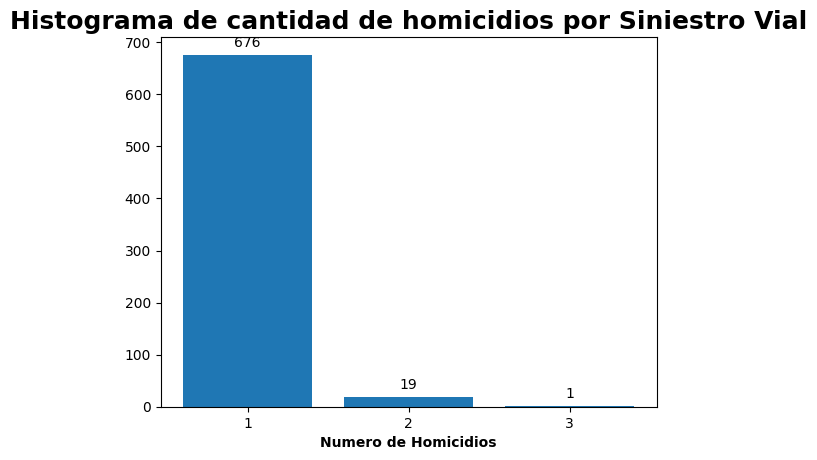

In [381]:
import matplotlib.pyplot as plt

# Crear el gráfico de barras
counts, bins, patches = plt.bar(hechos_an['N_VICTIMAS'].value_counts().index, 
                                hechos_an['N_VICTIMAS'].value_counts().values)

# Ajustar las etiquetas en el eje X
plt.xticks(ticks=[1, 2, 3], labels=hechos_an['N_VICTIMAS'].value_counts().index)
plt.xlabel('Numero de Homicidios',fontweight='bold')

# Añadir título
plt.title("Histograma de cantidad de homicidios por Siniestro Vial", fontsize=18, fontweight='bold')

# Añadir los valores encima de las barras con un ajuste en la posición
for index, value in enumerate(hechos_an['N_VICTIMAS'].value_counts().values):
    plt.text(index + 1, value + 10, str(value), ha='center', va='bottom', fontsize=10)

# Mostrar el gráfico
plt.show()


In [284]:
hechos_an['N_VICTIMAS'].value_counts()

N_VICTIMAS
1    676
2     19
3      1
Name: count, dtype: int64

#### Año

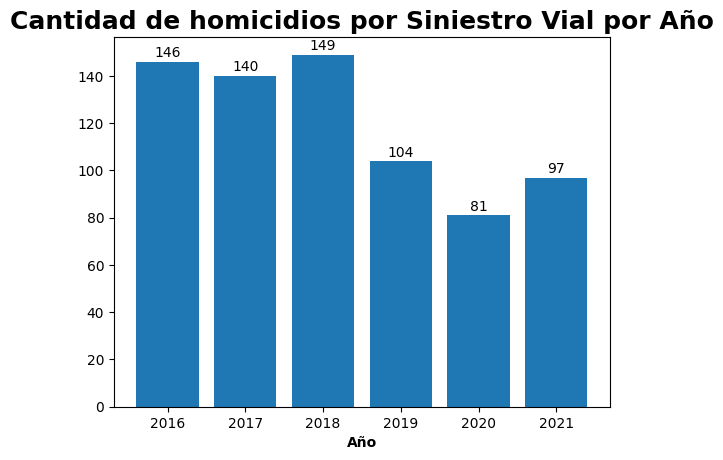

In [380]:
vict_anio = hechos_an.groupby(['AAAA']).agg({'N_VICTIMAS':'sum'})

plt.bar(vict_anio.index,vict_anio.values.flatten())
plt.xlabel('Año',fontweight='bold')
plt.title("Cantidad de homicidios por Siniestro Vial por Año", fontsize=18, fontweight='bold')

for index, value in enumerate(vict_anio.values.flatten()):
    plt.text(vict_anio.index[index], value + 2, str(int(value)), ha='center')

#### Mes

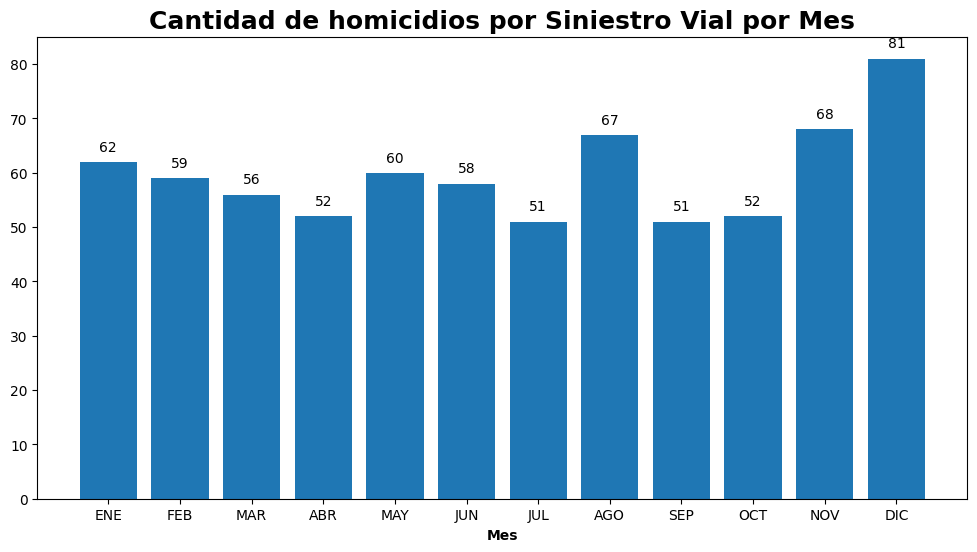

In [379]:
vict_mes = hechos_an.groupby(['MM']).agg({'N_VICTIMAS':'sum'})

plt.figure(figsize=(12,6))
plt.bar(vict_mes.index,vict_mes.values.flatten())
plt.xlabel('Mes',fontweight='bold')
plt.xticks(labels=['ENE','FEB','MAR','ABR','MAY','JUN','JUL','AGO','SEP','OCT','NOV','DIC'],ticks=vict_mes.index)
plt.title("Cantidad de homicidios por Siniestro Vial por Mes", fontsize=18, fontweight='bold')

for index, value in enumerate(vict_mes.values.flatten()):
    plt.text(vict_mes.index[index], value + 2, str(int(value)), ha='center')

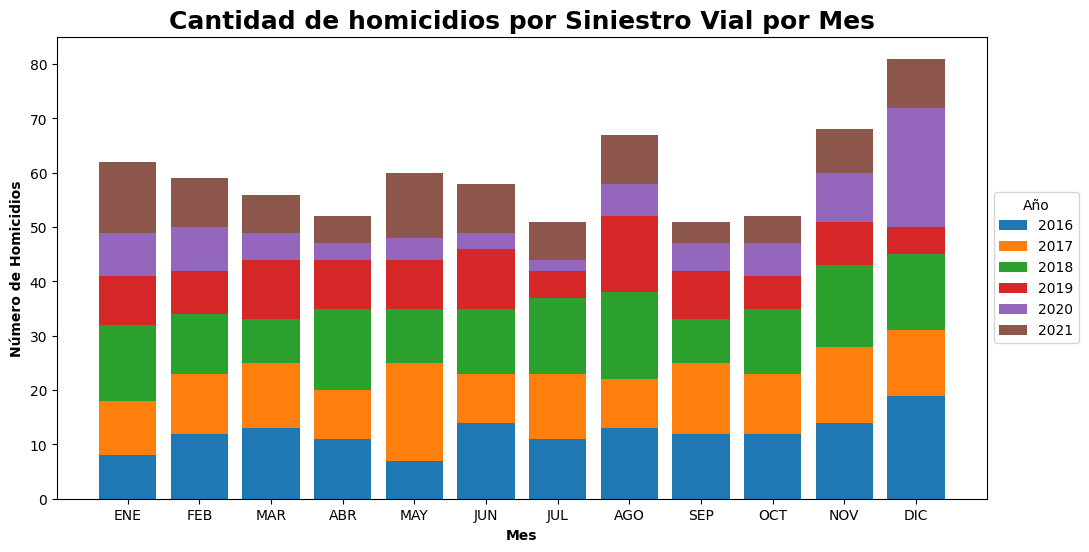

In [420]:
vict_anio_mes = hechos_an.groupby(['MM', 'AAAA']).agg({'N_VICTIMAS': 'sum'}).unstack()

# Definir los datos de víctimas por mes y año
vict_2016 = vict_anio_mes[('N_VICTIMAS', 2016)].values.flatten()
vict_2017 = vict_anio_mes[('N_VICTIMAS', 2017)].values.flatten()
vict_2018 = vict_anio_mes[('N_VICTIMAS', 2018)].values.flatten()
vict_2019 = vict_anio_mes[('N_VICTIMAS', 2019)].values.flatten()
vict_2020 = vict_anio_mes[('N_VICTIMAS', 2020)].values.flatten()
vict_2021 = vict_anio_mes[('N_VICTIMAS', 2021)].values.flatten()

# Crear figura y gráfico de barras apiladas
plt.figure(figsize=(12, 6))
plt.bar(vict_anio_mes.index, vict_2016, label='2016')
plt.bar(vict_anio_mes.index, vict_2017, bottom=vict_2016, label='2017')
plt.bar(vict_anio_mes.index, vict_2018, bottom=vict_2016 + vict_2017, label='2018')
plt.bar(vict_anio_mes.index, vict_2019, bottom=vict_2016 + vict_2017 + vict_2018, label='2019')
plt.bar(vict_anio_mes.index, vict_2020, bottom=vict_2016 + vict_2017 + vict_2018 + vict_2019, label='2020')
plt.bar(vict_anio_mes.index, vict_2021, bottom=vict_2016 + vict_2017 + vict_2018 + vict_2019 + vict_2020, label='2021')

# Etiquetas y título
plt.xticks(labels=['ENE', 'FEB', 'MAR', 'ABR', 'MAY', 'JUN', 'JUL', 'AGO', 'SEP', 'OCT', 'NOV', 'DIC'], ticks=vict_anio_mes.index)
plt.xlabel('Mes', fontweight='bold')
plt.ylabel('Número de Homicidios', fontweight='bold')
plt.title('Cantidad de homicidios por Siniestro Vial por Mes', fontsize=18, fontweight='bold')

# Añadir leyenda para identificar los años
plt.legend(title='Año',loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))

# Mostrar gráfico
plt.show()


#### Dia de la semana

In [415]:
vict_anio_mes

N_VICTIMAS                         
AAAA       2016 2017 2018 2019 2020 2021
MM                                      
1             8   10   14    9    8   13
2            12   11   11    8    8    9
3            13   12    8   11    5    7
4            11    9   15    9    3    5
5             7   18   10    9    4   12
6            14    9   12   11    3    9
7            11   12   14    5    2    7
8            13    9   16   14    6    9
9            12   13    8    9    5    4
10           12   11   12    6    6    5
11           14   14   15    8    9    8
12           19   12   14    5   22    9

In [414]:
vict_anio_dia = hechos_an.groupby(['DIA_SEMANA', 'AAAA']).agg({'N_VICTIMAS': 'sum'}).unstack()
vict_anio_dia

N_VICTIMAS                         
AAAA             2016 2017 2018 2019 2020 2021
DIA_SEMANA                                    
0                  22   33   18    8   10   16
1                  16   19   18   17   18   13
2                  27   12   24   19    4   13
3                  10   21   16   20   14   15
4                  19   18   32   12   11   10
5                  22   16   21   16   14   18
6                  30   21   20   12   10   12

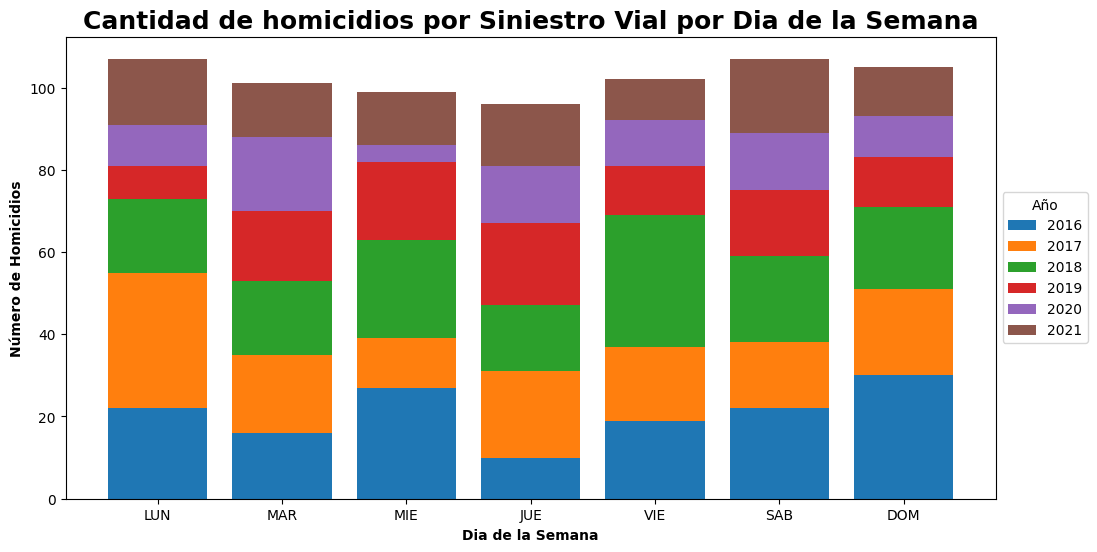

In [421]:
vict_anio_dia = hechos_an.groupby(['DIA_SEMANA', 'AAAA']).agg({'N_VICTIMAS': 'sum'}).unstack()

# Definir los datos de víctimas por mes y año
vict_2016_d = vict_anio_dia[('N_VICTIMAS', 2016)].values.flatten()
vict_2017_d = vict_anio_dia[('N_VICTIMAS', 2017)].values.flatten()
vict_2018_d = vict_anio_dia[('N_VICTIMAS', 2018)].values.flatten()
vict_2019_d = vict_anio_dia[('N_VICTIMAS', 2019)].values.flatten()
vict_2020_d = vict_anio_dia[('N_VICTIMAS', 2020)].values.flatten()
vict_2021_d = vict_anio_dia[('N_VICTIMAS', 2021)].values.flatten()

# Crear figura y gráfico de barras apiladas
plt.figure(figsize=(12, 6))
plt.bar(vict_anio_dia.index, vict_2016_d, label='2016')
plt.bar(vict_anio_dia.index, vict_2017_d, bottom=vict_2016_d, label='2017')
plt.bar(vict_anio_dia.index, vict_2018_d, bottom=vict_2016_d + vict_2017_d, label='2018')
plt.bar(vict_anio_dia.index, vict_2019_d, bottom=vict_2016_d + vict_2017_d + vict_2018_d, label='2019')
plt.bar(vict_anio_dia.index, vict_2020_d, bottom=vict_2016_d + vict_2017_d + vict_2018_d + vict_2019_d, label='2020')
plt.bar(vict_anio_dia.index, vict_2021_d, bottom=vict_2016_d + vict_2017_d + vict_2018_d + vict_2019_d + vict_2020_d, label='2021')

# Etiquetas y título
plt.xticks(labels=['LUN', 'MAR', 'MIE', 'JUE', 'VIE', 'SAB', 'DOM'], ticks=vict_anio_dia.index)
plt.xlabel('Dia de la Semana', fontweight='bold')
plt.ylabel('Número de Homicidios', fontweight='bold')
plt.title('Cantidad de homicidios por Siniestro Vial por Dia de la Semana', fontsize=18, fontweight='bold')

# Añadir leyenda para identificar los años
plt.legend(title='Año',loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))

# Mostrar gráfico
plt.show()

#### Hora

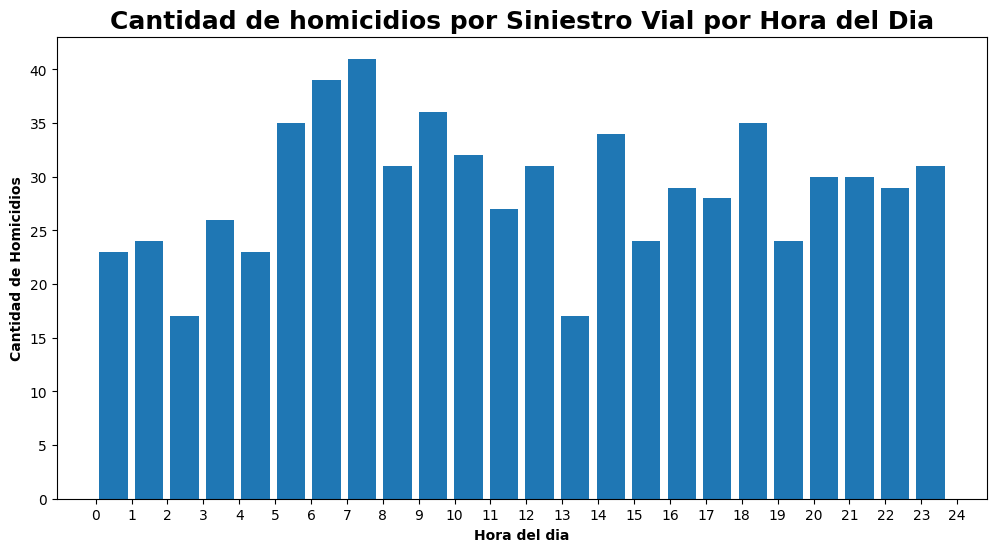

In [431]:
plt.figure(figsize=(12, 6))
plt.hist(hechos_an['HORA'],rwidth=0.8,bins=24)
plt.title('Cantidad de homicidios por Siniestro Vial por Hora del Dia', fontsize=18, fontweight='bold')
plt.xlabel('Hora del dia', fontweight='bold')
plt.ylabel('Cantidad de Homicidios', fontweight='bold')
plt.xticks(ticks=range(0,25))
plt.show()

#### Tipo de Calle

In [434]:
hechos_an['TIPO_DE_CALLE'].value_counts()

TIPO_DE_CALLE
AVENIDA      429
CALLE        136
AUTOPISTA     66
GRAL PAZ      65
Name: count, dtype: int64

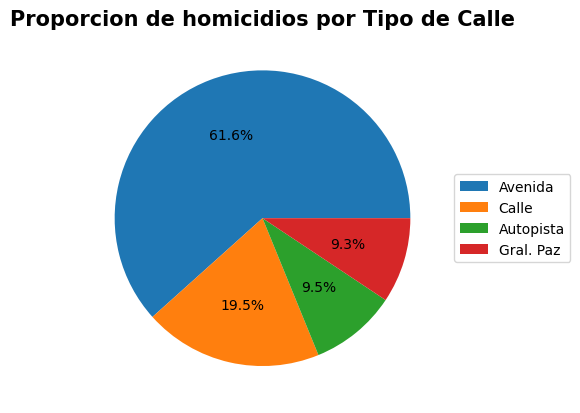

In [435]:
plt.pie(hechos_an['TIPO_DE_CALLE'].value_counts(),autopct='%1.1f%%')
plt.title('Proporcion de homicidios por Tipo de Calle',fontsize=15,fontweight='bold',loc='center')
plt.legend(['Avenida',
            'Calle',
            'Autopista',
            'Gral. Paz'
],loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

In [436]:
hechos_an

,ID,N_VICTIMAS,AAAA,MM,HORA,TIPO_DE_CALLE,COMUNA,VICTIMA,ACUSADO,DIA_SEMANA,VIAS_INVOL,INTERSECCION
0,2016-0001,1,2016,1,4.000000,AVENIDA,8,MOTO,AUTO,4,"[PIEDRA BUENA AV., FERNANDEZ DE LA CRUZ, F., G...",1
1,2016-0002,1,2016,1,1.250000,GRAL PAZ,9,AUTO,PASAJEROS,5,"[PAZ, GRAL. AV., DE LOS CORRALES AV.]",1
2,2016-0003,1,2016,1,7.000000,AVENIDA,1,MOTO,AUTO,6,[ENTRE RIOS AV.],0
3,2016-0004,1,2016,1,0.000000,AVENIDA,8,MOTO,SD,6,"[LARRAZABAL AV., VILLEGAS, CONRADO, GRAL.]",1
4,2016-0005,1,2016,1,5.333333,AVENIDA,1,MOTO,PASAJEROS,3,"[SAN JUAN AV., SAENZ PE?A, LUIS, PRES.]",1
...,...,...,...,...,...,...,...,...,...,...,...,...
691,2021-0093,1,2021,12,17.166667,AVENIDA,7,MOTO,AUTO,0,"[RIESTRA AV., MOM]",1
692,2021-0094,1,2021,12,1.166667,AUTOPISTA,9,MOTO,AUTO,0,"[DELLEPIANE, LUIS, TTE. GRAL., LACARRA AV.]",1
693,2021-0095,1,2021,12,0.716667,AVENIDA,11,MOTO,CARGAS,3,"[GAONA AV., TERRADA]",1
694,2021-0096,1,2021,12,10.500000,AVENIDA,9,AUTO,CARGAS,2,"[PERON, EVA AV.]",0


#### Interseccion

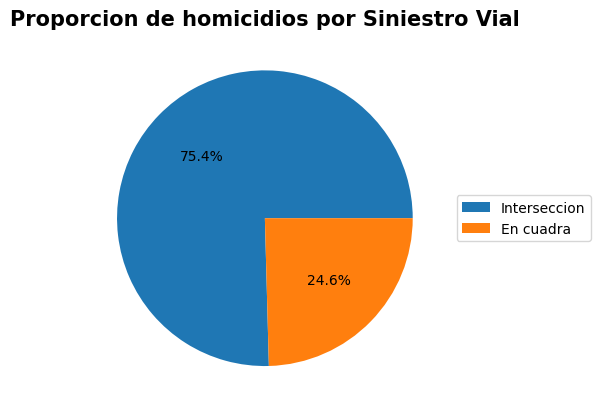

In [439]:
plt.pie(hechos_an['INTERSECCION'].value_counts(),autopct='%1.1f%%')
plt.title('Proporcion de homicidios por Siniestro Vial',fontsize=15,fontweight='bold',loc='center')
plt.legend(['Interseccion',
            'En cuadra'
],loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

## Hechos Visualizacion

In [71]:
hechos_vis = df_hechos.copy()

In [45]:
hechos_vis.drop(columns=['FECHA','LUGAR_DEL_HECHO','Dirección Normalizada'],inplace=True)

In [46]:
hechos['geo_norm'] = hechos['XY (CABA)'].apply(lambda x: re.sub(r"[^0-9.]", " ", str(x)).strip().split())

In [29]:
hechos

,ID,N_VICTIMAS,AAAA,MM,DD,HORA,HH,TIPO_DE_CALLE,Calle,Altura,Cruce,COMUNA,XY (CABA),pos x,pos y,VICTIMA,ACUSADO,geo_norm
0,2016-0001,1,2016,1,1,04:00:00,4,AVENIDA,PIEDRA BUENA AV.,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO,AUTO,"[98896.78238426, 93532.43437792]"
1,2016-0002,1,2016,1,2,01:15:00,1,GRAL PAZ,"PAZ, GRAL. AV.",NaN,DE LOS CORRALES AV.,9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO,PASAJEROS,"[95832.05571093, 95505.41641999]"
2,2016-0003,1,2016,1,3,07:00:00,7,AVENIDA,ENTRE RIOS AV.,2034.0,NaN,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO,AUTO,"[106684.29090040, 99706.57687843]"
3,2016-0004,1,2016,1,10,00:00:00,0,AVENIDA,LARRAZABAL AV.,NaN,"VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO,SD,"[99840.65224780, 94269.16534422]"
4,2016-0005,1,2016,1,21,05:20:00,5,AVENIDA,SAN JUAN AV.,NaN,"SAENZ PE?A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO,PASAJEROS,"[106980.32827929, 100752.16915795]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,2021-0093,1,2021,12,13,17:10:00,17,AVENIDA,RIESTRA AV.,NaN,MOM,7,Point (102728.60090138 98186.24929177),-58.43353773,-34.64561636,MOTO,AUTO,"[102728.60090138, 98186.24929177]"
692,2021-0094,1,2021,12,20,01:10:00,1,AUTOPISTA,"DELLEPIANE, LUIS, TTE. GRAL.",NaN,LACARRA AV.,9,Point (99624.29795829 97569.69801131),-58.46739825,-34.65117757,MOTO,AUTO,"[99624.29795829, 97569.69801131]"
693,2021-0095,1,2021,12,30,00:43:00,0,AVENIDA,GAONA AV.,NaN,TERRADA,11,Point (99116.45492358 101045.23284826),-58.47293407,-34.61984745,MOTO,CARGAS,"[99116.45492358, 101045.23284826]"
694,2021-0096,1,2021,12,15,10:30:00,10,AVENIDA,"PERON, EVA AV.",4071.0,NaN,9,Point (99324.54463985 97676.26932409),-58.47066794,-34.65021673,AUTO,CARGAS,"[99324.54463985, 97676.26932409]"


In [48]:
hechos['X']=hechos['geo_norm'].apply(lambda x : x[0])
hechos['Y']=hechos['geo_norm'].apply(lambda x : x[1])
hechos.drop(columns=['XY (CABA)','geo_norm'],inplace=True)

In [53]:
hechos_vis.rename(columns={'pos x':'longitud','pos y':'latitud'},inplace=True)

In [54]:
hechos

,ID,N_VICTIMAS,AAAA,MM,DD,HORA,HH,TIPO_DE_CALLE,Calle,Altura,Cruce,COMUNA,longitud,latitud,VICTIMA,ACUSADO,X,Y
0,2016-0001,1,2016,1,1,04:00:00,4,AVENIDA,PIEDRA BUENA AV.,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.",8,-58.47533969,-34.68757022,MOTO,AUTO,98896.78238426,93532.43437792
1,2016-0002,1,2016,1,2,01:15:00,1,GRAL PAZ,"PAZ, GRAL. AV.",NaN,DE LOS CORRALES AV.,9,-58.50877521,-34.66977709,AUTO,PASAJEROS,95832.05571093,95505.41641999
2,2016-0003,1,2016,1,3,07:00:00,7,AVENIDA,ENTRE RIOS AV.,2034.0,NaN,1,-58.39040293,-34.63189362,MOTO,AUTO,106684.29090040,99706.57687843
3,2016-0004,1,2016,1,10,00:00:00,0,AVENIDA,LARRAZABAL AV.,NaN,"VILLEGAS, CONRADO, GRAL.",8,-58.46503904,-34.68092974,MOTO,SD,99840.65224780,94269.16534422
4,2016-0005,1,2016,1,21,05:20:00,5,AVENIDA,SAN JUAN AV.,NaN,"SAENZ PE?A, LUIS, PRES.",1,-58.38718297,-34.62246630,MOTO,PASAJEROS,106980.32827929,100752.16915795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,2021-0093,1,2021,12,13,17:10:00,17,AVENIDA,RIESTRA AV.,NaN,MOM,7,-58.43353773,-34.64561636,MOTO,AUTO,102728.60090138,98186.24929177
692,2021-0094,1,2021,12,20,01:10:00,1,AUTOPISTA,"DELLEPIANE, LUIS, TTE. GRAL.",NaN,LACARRA AV.,9,-58.46739825,-34.65117757,MOTO,AUTO,99624.29795829,97569.69801131
693,2021-0095,1,2021,12,30,00:43:00,0,AVENIDA,GAONA AV.,NaN,TERRADA,11,-58.47293407,-34.61984745,MOTO,CARGAS,99116.45492358,101045.23284826
694,2021-0096,1,2021,12,15,10:30:00,10,AVENIDA,"PERON, EVA AV.",4071.0,NaN,9,-58.47066794,-34.65021673,AUTO,CARGAS,99324.54463985,97676.26932409


In [64]:
hechos_vis.to_csv('hechos.csv', index=False)

In [65]:
hechos

,ID,N_VICTIMAS,AAAA,MM,DD,HORA,HH,TIPO_DE_CALLE,Calle,Altura,Cruce,COMUNA,longitud,latitud,VICTIMA,ACUSADO,X,Y,comunas
0,2016-0001,1,2016,1,1,04:00:00,4,AVENIDA,PIEDRA BUENA AV.,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.",8,-58.47533969,-34.68757022,MOTO,AUTO,98896.78238426,93532.43437792,Comuna 8
1,2016-0002,1,2016,1,2,01:15:00,1,GRAL PAZ,"PAZ, GRAL. AV.",NaN,DE LOS CORRALES AV.,9,-58.50877521,-34.66977709,AUTO,PASAJEROS,95832.05571093,95505.41641999,Comuna 9
2,2016-0003,1,2016,1,3,07:00:00,7,AVENIDA,ENTRE RIOS AV.,2034.0,NaN,1,-58.39040293,-34.63189362,MOTO,AUTO,106684.29090040,99706.57687843,Comuna 1
3,2016-0004,1,2016,1,10,00:00:00,0,AVENIDA,LARRAZABAL AV.,NaN,"VILLEGAS, CONRADO, GRAL.",8,-58.46503904,-34.68092974,MOTO,SD,99840.65224780,94269.16534422,Comuna 8
4,2016-0005,1,2016,1,21,05:20:00,5,AVENIDA,SAN JUAN AV.,NaN,"SAENZ PE?A, LUIS, PRES.",1,-58.38718297,-34.62246630,MOTO,PASAJEROS,106980.32827929,100752.16915795,Comuna 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,2021-0093,1,2021,12,13,17:10:00,17,AVENIDA,RIESTRA AV.,NaN,MOM,7,-58.43353773,-34.64561636,MOTO,AUTO,102728.60090138,98186.24929177,Comuna 7
692,2021-0094,1,2021,12,20,01:10:00,1,AUTOPISTA,"DELLEPIANE, LUIS, TTE. GRAL.",NaN,LACARRA AV.,9,-58.46739825,-34.65117757,MOTO,AUTO,99624.29795829,97569.69801131,Comuna 9
693,2021-0095,1,2021,12,30,00:43:00,0,AVENIDA,GAONA AV.,NaN,TERRADA,11,-58.47293407,-34.61984745,MOTO,CARGAS,99116.45492358,101045.23284826,Comuna 11
694,2021-0096,1,2021,12,15,10:30:00,10,AVENIDA,"PERON, EVA AV.",4071.0,NaN,9,-58.47066794,-34.65021673,AUTO,CARGAS,99324.54463985,97676.26932409,Comuna 9


In [ ]:
df_victimas = pd.read_excel('homicidios.xlsx', sheet_name='VICTIMAS')
df_victimas

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...
712,2021-0092,2021-12-12,2021,12,12,PEATON,PEATON,FEMENINO,50,2021-12-12 00:00:00
713,2021-0093,2021-12-13,2021,12,13,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,18,2021-12-18 00:00:00
714,2021-0094,2021-12-20,2021,12,20,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,43,2021-12-20 00:00:00
715,2021-0095,2021-12-30,2021,12,30,CONDUCTOR,MOTO,MASCULINO,27,2022-01-02 00:00:00
